In [95]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,LeakyReLU, AveragePooling2D,Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [81]:
# Load the TensorFlow Flowers dataset
print("Loading the TensorFlow Flowers dataset...")
dataset, info = tfds.load('tf_flowers', as_supervised=True,  with_info=True, split=['train[:80%]', 'train[80%:]']
)
train_ds, val_ds = dataset
class_names = info.features['label'].names
print(f"Class Names: {class_names}")


Loading the TensorFlow Flowers dataset...
Class Names: ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


In [16]:
# Preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, (180, 180)) / 255.0
    return image, label

In [17]:
# Convert dataset to numpy arrays
def dataset_to_numpy(ds):
    images, labels = [], []
    for img, lbl in ds.map(preprocess):
        images.append(img.numpy())
        labels.append(lbl.numpy())
    return np.array(images), np.array(labels)

print("Processing the dataset...")
X_train, y_train = dataset_to_numpy(train_ds)
X_val, y_val = dataset_to_numpy(val_ds)

Processing the dataset...


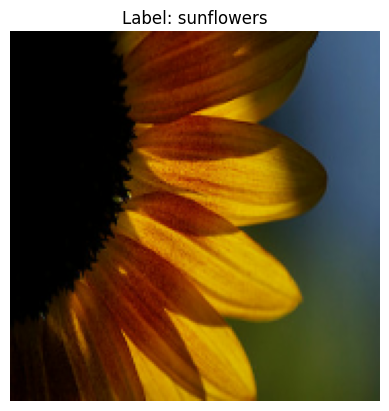

In [101]:
# Visualize a single flower image
plt.imshow(X_train[1])
plt.title(f"Label: {class_names[np.argmax(y_train[1])]}")
plt.axis("off")
plt.show()

In [40]:
# Reshape data for CNN (add channel dimension)
X_train = X_train.reshape(X_train.shape[0], 180, 180, 3)
X_val = X_val.reshape(X_val.shape[0], 180, 180, 3)


In [21]:
# One-hot encode the target
num_classes = len(class_names)
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)

In [70]:
# Model 1: Simple model with Conv2D and MaxPooling2D
def create_model_1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))  # Conv Layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling Layer 1
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Conv Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling Layer 2
    model.add(Flatten())  # Flatten layer
    model.add(Dense(128, activation='relu'))  # Dense Layer 1
    model.add(Dense(num_classes, activation='softmax'))  # Output Layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,942,865 (76.08 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,295,244 (50.72 MB)

In [93]:

# Model 2: Deeper model with Conv2D and AveragePooling2D
def create_model_2():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))  # Conv Layer 1
    model.add(AveragePooling2D(pool_size=(2, 2)))  # AveragePooling Layer 1
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))  # Conv Layer 2
    model.add(AveragePooling2D(pool_size=(2, 2)))  # AveragePooling Layer 2
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))  # Conv Layer 3
    model.add(AveragePooling2D(pool_size=(2, 2)))  # AveragePooling Layer 3
    model.add(Flatten())  # Flatten layer
    model.add(Dense(128, activation='relu'))  # Dense Layer 1
    model.add(Dense(num_classes, activation='softmax'))  # Output Layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model_2=create_model_2()
model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 178, 178, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 89, 89, 64)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 87, 87, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_8                  │ (None, 43, 43, 128)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 41, 41, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_9                  │ (None, 20, 20, 256)         │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 102400)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │      13,107,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,478,789 (51.42 MB)

 Trainable params: 13,478,789 (51.42 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
# Model 3: Deeper model with Dropout and MaxPooling2D
def create_model_3():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(180, 180, 3)))  # Conv Layer 1
    model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling Layer 1
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))  # Conv Layer 2
    model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling Layer 2
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))  # Conv Layer 3
    model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling Layer 3
    model.add(Dropout(0.5))  # Dropout Layer
    model.add(Flatten())  # Flatten layer
    model.add(Dense(256, activation='relu'))  # Dense Layer 1
    model.add(Dense(num_classes, activation='softmax'))  # Output Layer
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
model_3=create_model_3()
model_3.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,201,989 (50.36 MB)

 Trainable params: 13,201,989 (50.36 MB)

 Non-trainable params: 0 (0.00 B)

In [97]:
# Function to train and evaluate a model
def train_and_evaluate_model(model):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)
    loss, accuracy = model.evaluate(X_val, y_val)
    print(f"Validation Accuracy: {accuracy:.2f}")
    return history, accuracy


In [98]:
# Train and evaluate Model 1 (Base Model with MaxPooling)
print("Training Model 1...")
model_1 = create_model_1()
history_1, accuracy_1 = train_and_evaluate_model(model_1)

Training Model 1...
Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.2785 - loss: 2.6494 - val_accuracy: 0.5082 - val_loss: 1.1741
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - accuracy: 0.5673 - loss: 1.0600 - val_accuracy: 0.5831 - val_loss: 1.0482
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - accuracy: 0.7694 - loss: 0.6397 - val_accuracy: 0.5831 - val_loss: 1.1121
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.8813 - loss: 0.3453 - val_accuracy: 0.5736 - val_loss: 1.3777
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.9575 - loss: 0.1598 - val_accuracy: 0.5954 - val_loss: 1.5247
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 595ms/step - accuracy: 0.6041 - loss: 1.4601
Validation Accuracy: 0.60


In [100]:
# Train and evaluate Model 2 (Deeper Model with AveragePooling)
print("Training Model 2...")
model_2 = create_model_2()
history_2, accuracy_2 = train_and_evaluate_model(model_2)

Training Model 2...
Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 562s 6s/step - accuracy: 0.3882 - loss: 1.5605 - val_accuracy: 0.5163 - val_loss: 1.1727
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 564s 6s/step - accuracy: 0.5747 - loss: 1.0746 - val_accuracy: 0.5763 - val_loss: 1.0568
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 620s 6s/step - accuracy: 0.6483 - loss: 0.8788 - val_accuracy: 0.6090 - val_loss: 0.9859
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 566s 6s/step - accuracy: 0.7166 - loss: 0.7431 - val_accuracy: 0.6158 - val_loss: 1.0338
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 569s 6s/step - accuracy: 0.8151 - loss: 0.5157 - val_accuracy: 0.6226 - val_loss: 1.0250
23/23 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.6256 - loss: 1.0240
Validation Accuracy: 0.62


In [102]:
# Train and evaluate Model 3 (Deeper Model with Dropout and MaxPooling)
print("Training Model 3...")
model_3 = create_model_3()
history_3, accuracy_3 = train_and_evaluate_model(model_3)

Training Model 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.3370 - loss: 1.5668 - val_accuracy: 0.5777 - val_loss: 1.0309
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.5908 - loss: 1.0130 - val_accuracy: 0.6349 - val_loss: 0.9306
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.6891 - loss: 0.8169 - val_accuracy: 0.6540 - val_loss: 0.9005
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.7560 - loss: 0.6356 - val_accuracy: 0.6948 - val_loss: 0.8461
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8374 - loss: 0.4339 - val_accuracy: 0.6839 - val_loss: 0.9089
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 641ms/step - accuracy: 0.6879 - loss: 0.8977
Validation Accuracy: 0.68


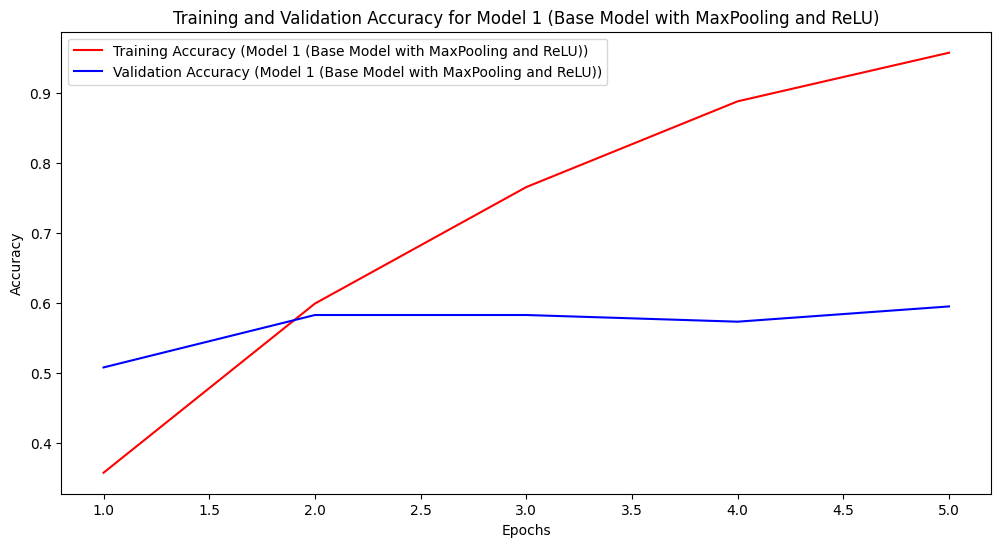

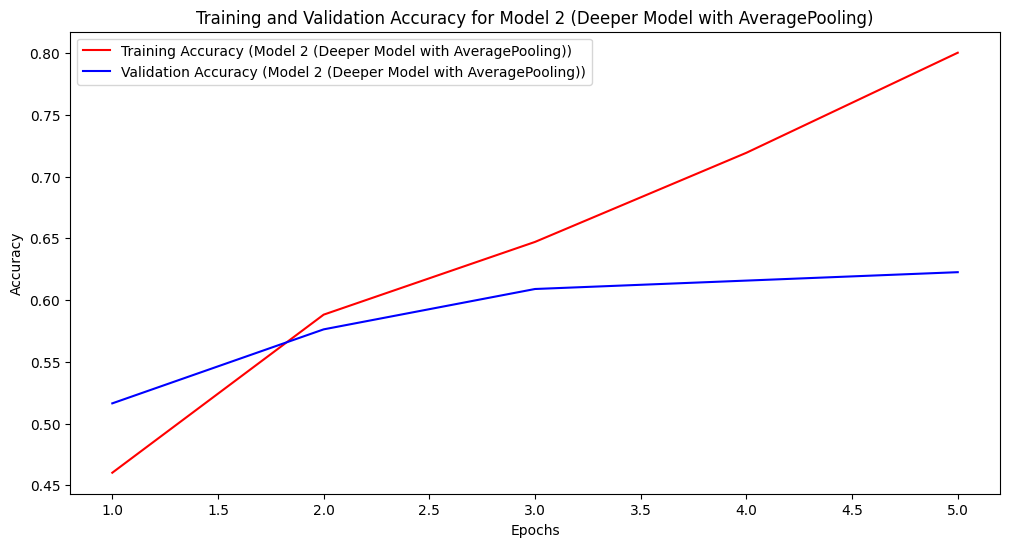

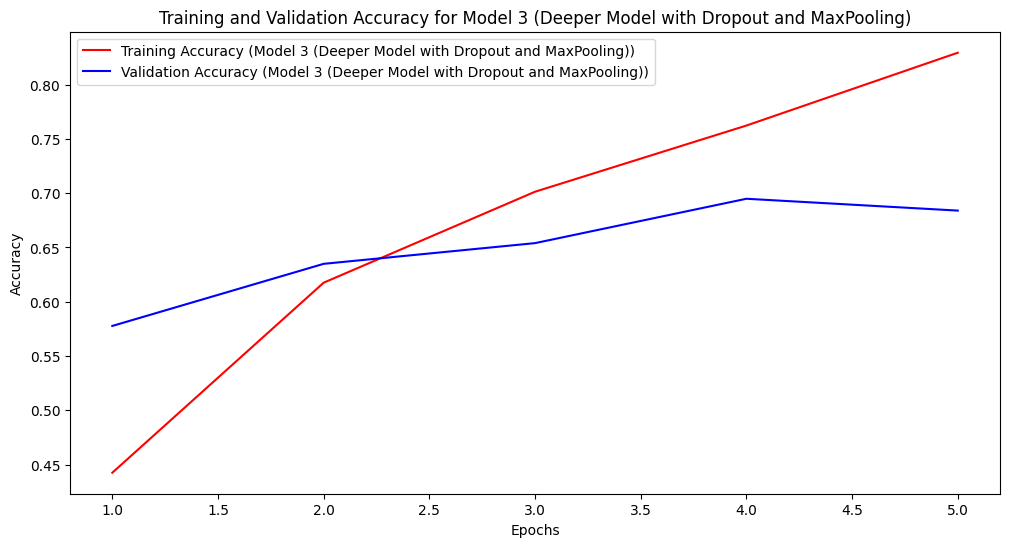

In [103]:
# Plot training and validation accuracy for all models
def plot_accuracy(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, acc, 'r', label=f'Training Accuracy ({model_name})')
    plt.plot(epochs, val_acc, 'b', label=f'Validation Accuracy ({model_name})')
    plt.title(f'Training and Validation Accuracy for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy(history_1, "Model 1 (Base Model with MaxPooling and ReLU)")
plot_accuracy(history_2, "Model 2 (Deeper Model with AveragePooling)")
plot_accuracy(history_3, "Model 3 (Deeper Model with Dropout and MaxPooling)")

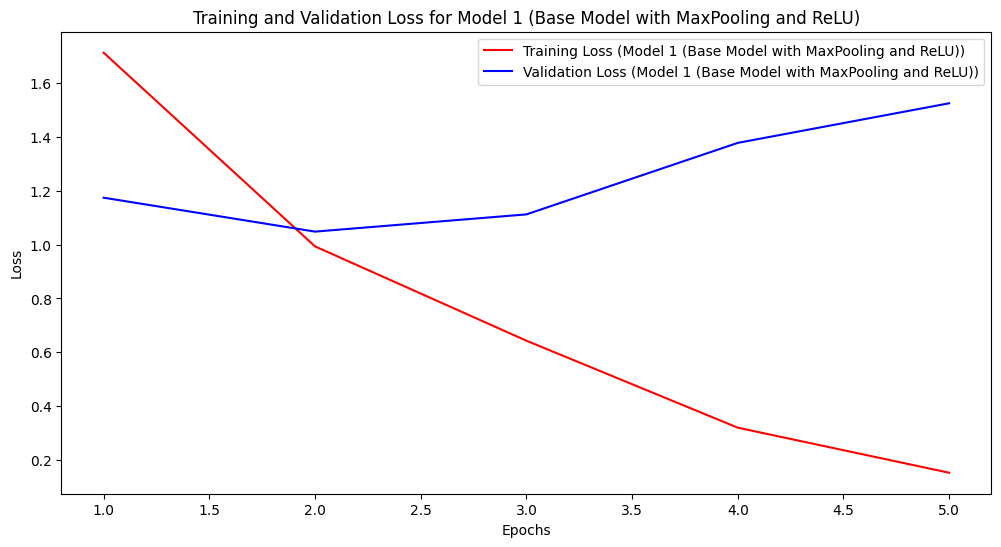

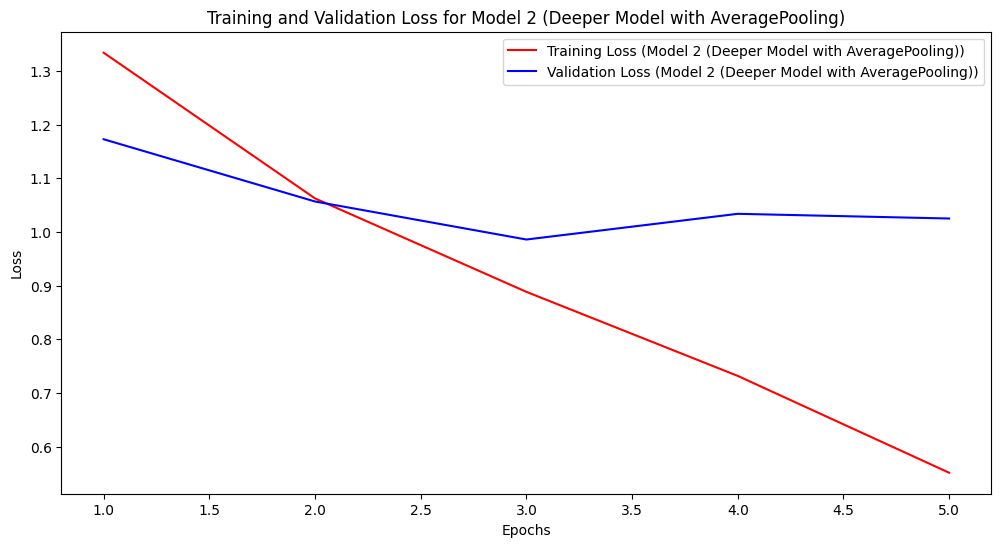

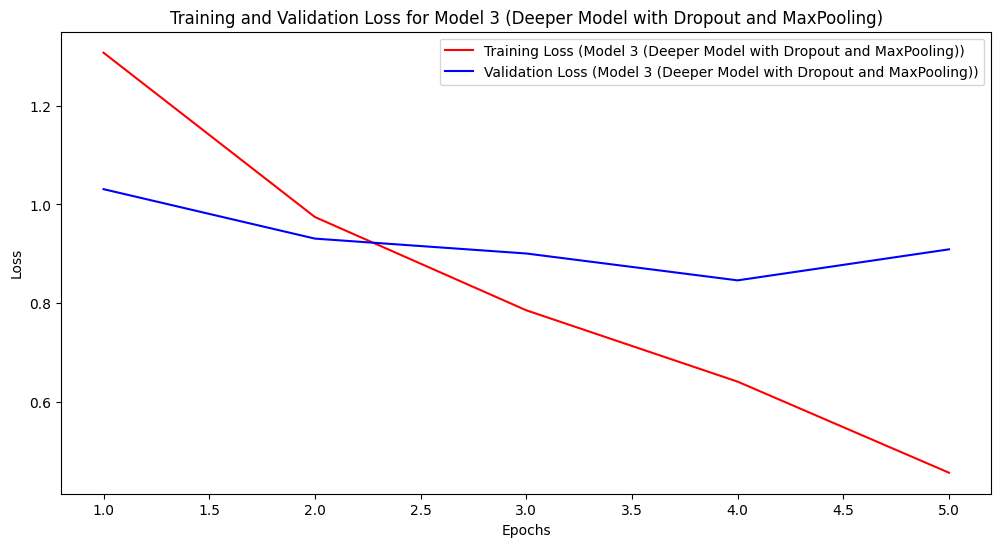

In [104]:
# Plot training and validation loss for all models
def plot_loss(history, model_name):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 6))
    plt.plot(epochs, loss, 'r', label=f'Training Loss ({model_name})')
    plt.plot(epochs, val_loss, 'b', label=f'Validation Loss ({model_name})')
    plt.title(f'Training and Validation Loss for {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Model 1 (Base Model with MaxPooling and ReLU)")
plot_loss(history_2, "Model 2 (Deeper Model with AveragePooling)")
plot_loss(history_3, "Model 3 (Deeper Model with Dropout and MaxPooling)")